<a href="https://colab.research.google.com/github/Gressling/notebooks/blob/main/Random_Shape_Generator_and_Transformer%2C_convert_to_bitmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

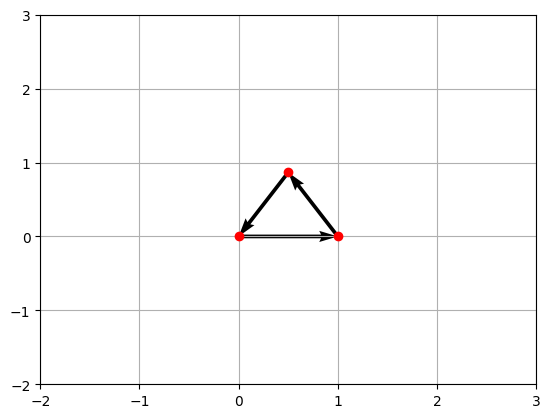

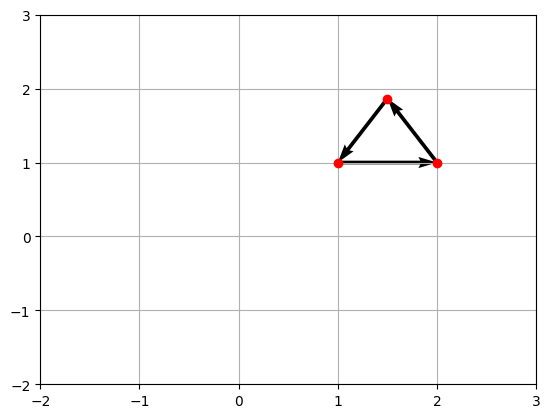

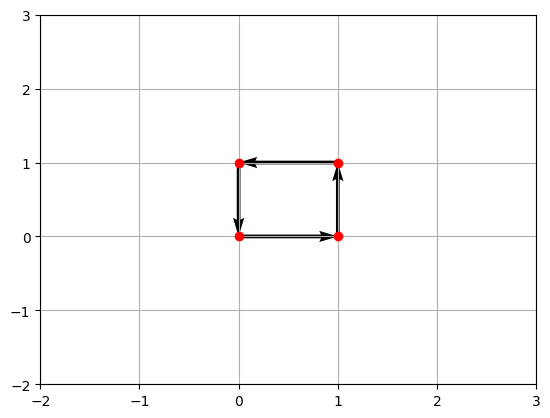

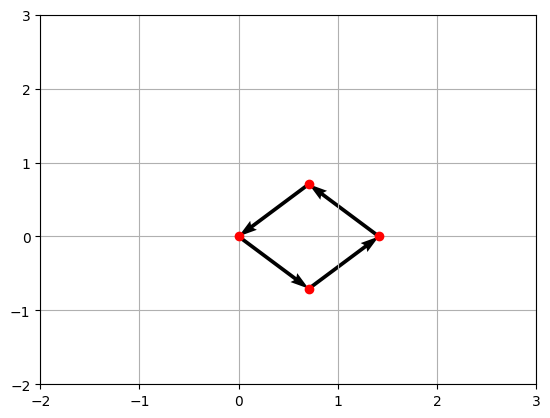

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shape(vertices):
    """
    Plot a shape defined by its vertices and depict the vectors between the vertices.
    """
    num_vertices = len(vertices)
    fig, ax = plt.subplots()
    ax.set_xlim(-2, 3)
    ax.set_ylim(-2, 3)

    for i in range(num_vertices):
        start_point = vertices[i]
        end_point = vertices[(i + 1) % num_vertices]
        vector = end_point - start_point
        ax.quiver(*start_point, *vector, angles='xy', scale_units='xy', scale=1)

    ax.plot(vertices[:,0], vertices[:,1], 'ro')
    plt.grid()
    plt.show()

def translate(vertices, translation_vector):
    """
    Translate the shape by a given vector.
    """
    return vertices + translation_vector

def rotate(vertices, angle, origin=(0, 0)):
    """
    Rotate the shape around a given origin.
    """
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad),  np.cos(angle_rad)]])
    translated_vertices = vertices - origin
    rotated_vertices = np.dot(translated_vertices, rotation_matrix)
    rotated_vertices = rotated_vertices + origin
    return rotated_vertices

# Define shapes
triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Transform shapes
translated_triangle = translate(triangle, np.array([1, 1]))
rotated_square = rotate(square, 45)

# Plot shapes
plot_shape(triangle)
plot_shape(translated_triangle)
plot_shape(square)
plot_shape(rotated_square)


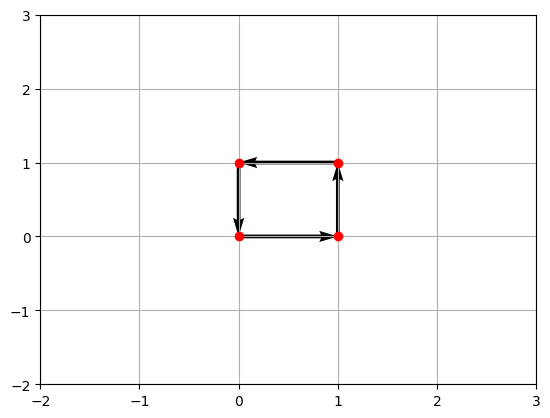

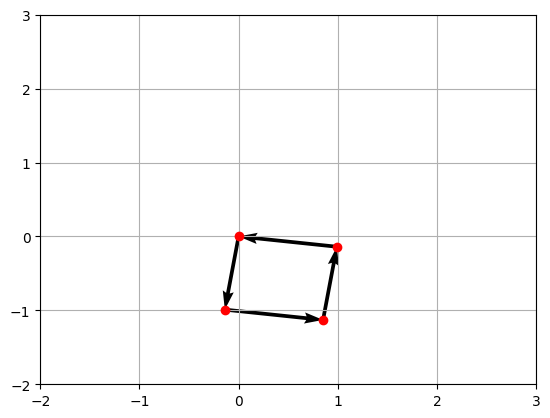

In [ ]:
# Transform shapes
translated_sqare = translate(triangle, np.array([1, 1]))
rotated_square = rotate(square, 98)

# Plot shapes
plot_shape(square)
plot_shape(rotated_square)

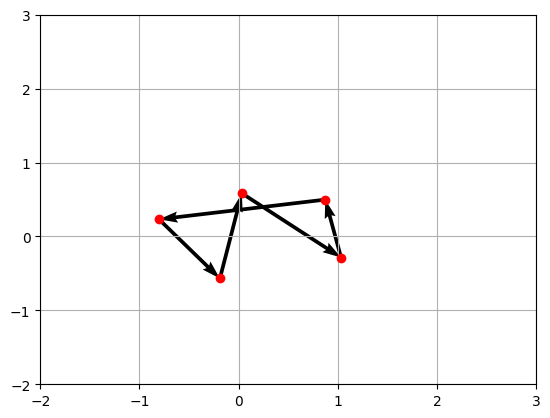

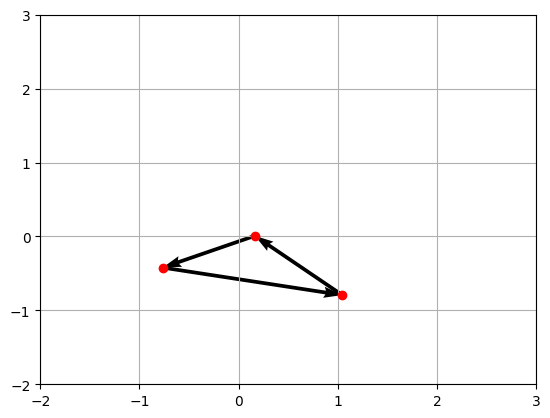

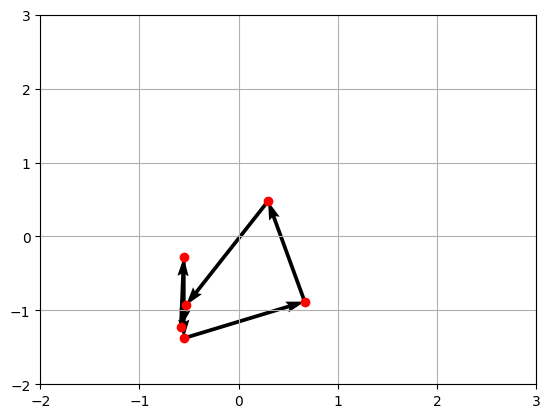

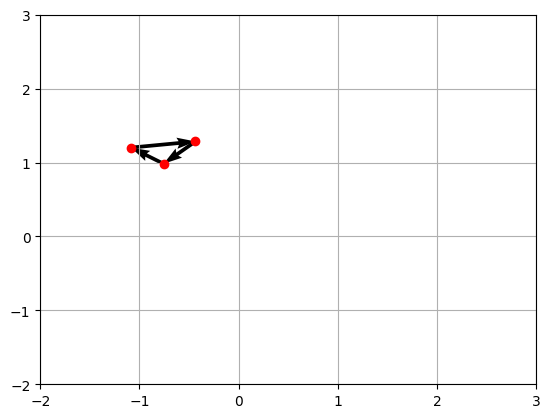

In [ ]:
import random

def mixer(number_of_shapes, max_vertices=6):
    """
    Generate a specified number of random shapes with varying numbers of vertices,
    randomly translate and rotate them.

    Parameters:
    number_of_shapes (int): The number of shapes to generate.
    max_vertices (int): The maximum number of vertices each shape can have.

    Returns:
    List of numpy arrays: Transformed vertices of each shape.
    """
    shapes = []
    for _ in range(number_of_shapes):
        # Randomly determine the number of vertices for the shape
        num_vertices = random.randint(3, max_vertices)

        # Generate random vertices
        vertices = np.random.rand(num_vertices, 2) * 2 - 1  # Random points in the range [-1, 1]

        # Randomly translate and rotate the shape
        translation_vector = np.random.rand(2) * 2 - 1  # Translation vector in range [-1, 1]
        rotation_angle = random.randint(0, 360)  # Rotation angle in degrees

        transformed_vertices = translate(vertices, translation_vector)
        transformed_vertices = rotate(transformed_vertices, rotation_angle)

        shapes.append(transformed_vertices)

    return shapes

# Generate and plot random shapes
random_shapes = mixer(4)
for shape in random_shapes:
    plot_shape(shape)


In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors

def plot_shape_to_bitmap(vertices, size=(25, 25), axes_range=(-2, 3)):
    """
    Plot a shape and convert it to a grayscale bitmap.

    Parameters:
    vertices (numpy array): Vertices of the shape.
    size (tuple): The size of the bitmap.
    axes_range (tuple): The range of the axes.

    Returns:
    numpy array: Grayscale bitmap of the shape.
    """
    # Create a figure with the specified size and range
    fig, ax = plt.subplots(figsize=(size[0]/100, size[1]/100), dpi=100)
    ax.set_xlim(axes_range[0], axes_range[1])
    ax.set_ylim(axes_range[0], axes_range[1])

    # Create a polygon patch and add it to the axis
    polygon = Polygon(vertices, closed=True, edgecolor='none')
    p = PatchCollection([polygon], match_original=True, cmap=plt.cm.gray)
    ax.add_collection(p)

    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    # Draw the canvas and retrieve the pixel buffer
    fig.canvas.draw()
    bitmap = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    bitmap = bitmap.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # Convert to grayscale
    grayscale_bitmap = np.dot(bitmap[...,:3], [0.2989, 0.5870, 0.1140])

    plt.close(fig)  # Close the figure to prevent display
    return grayscale_bitmap

# Example: Convert the first random shape to a grayscale bitmap
bitmap = plot_shape_to_bitmap(random_shapes[0])
plt.imshow(bitmap, cmap='gray')
plt.axis('off')
plt.show()

NameError: name 'random_shapes' is not defined

In [ ]:
# Example: Convert the first random shape to a grayscale bitmap
bitmap = plot_shape_to_bitmap(random_shapes[2])
plt.imshow(bitmap, cmap='gray')
plt.axis('off')
plt.show()

NameError: name 'random_shapes' is not defined

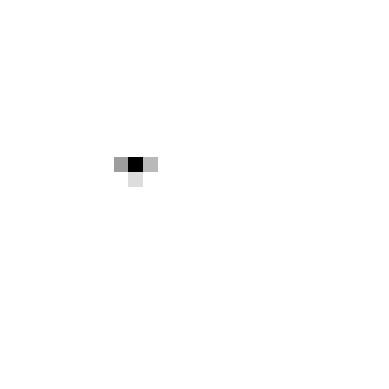

In [ ]:
# Example: Convert the first random shape to a grayscale bitmap
bitmap = plot_shape_to_bitmap(random_shapes[3])
plt.imshow(bitmap, cmap='gray')
plt.axis('off')
plt.show()

from now on generating random images

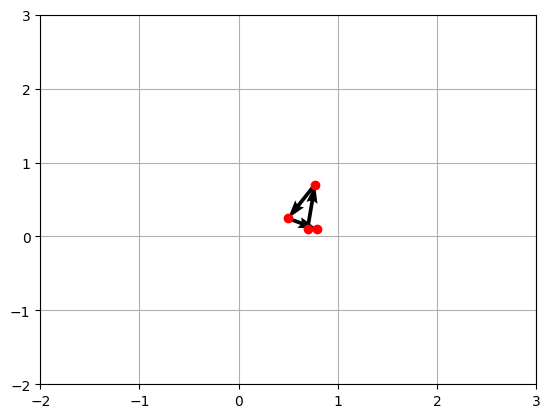

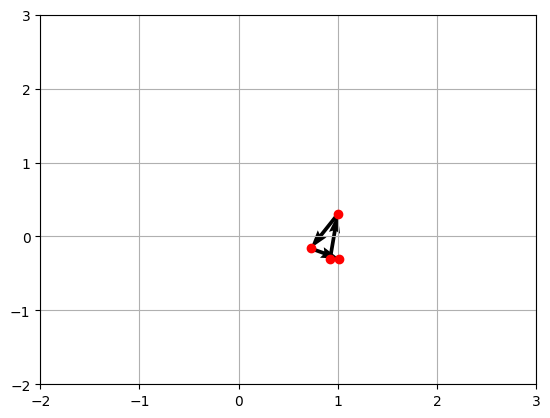

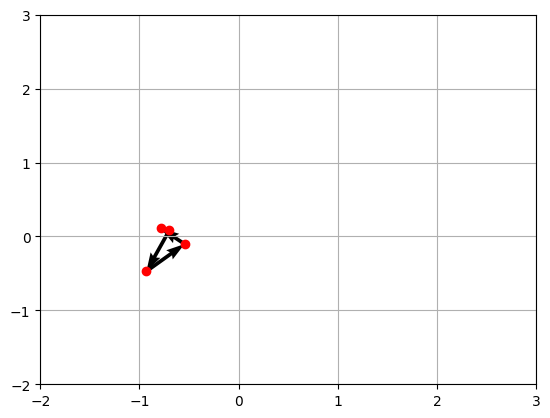

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_random_shape(num_vertices=3):
    """
    Generate a random shape with the specified number of vertices.
    """
    return np.random.rand(num_vertices, 2)  # Generates random vertices between [0, 1).

def plot_shape(vertices):
    """
    Plot a shape defined by its vertices and depict the vectors between the vertices.
    """
    num_vertices = len(vertices)
    fig, ax = plt.subplots()
    ax.set_xlim(-2, 3)
    ax.set_ylim(-2, 3)

    for i in range(num_vertices):
        start_point = vertices[i]
        end_point = vertices[(i + 1) % num_vertices]
        vector = end_point - start_point
        ax.quiver(*start_point, *vector, angles='xy', scale_units='xy', scale=1)

    ax.plot(vertices[:, 0], vertices[:, 1], 'ro')
    plt.grid()
    plt.show()

def translate(vertices, translation_vector):
    """
    Translate the shape by a given vector.
    """
    return vertices + translation_vector

def rotate(vertices, angle, origin=(0, 0)):
    """
    Rotate the shape around a given origin.
    """
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad),  np.cos(angle_rad)]])
    translated_vertices = vertices - origin
    rotated_vertices = np.dot(translated_vertices, rotation_matrix)
    rotated_vertices = rotated_vertices + origin
    return rotated_vertices

# Generate a random shape with a random number of vertices
random_shape = generate_random_shape(num_vertices=np.random.randint(3, 7))

# Transform the random shape
translated_random_shape = translate(random_shape, np.random.rand(2) * 2 - 1)  # Random translation vector between [-1, 1).
rotated_random_shape = rotate(random_shape, np.random.uniform(0, 360))

# Plot the random shape and its transformations
plot_shape(random_shape)
plot_shape(translated_random_shape)
plot_shape(rotated_random_shape)


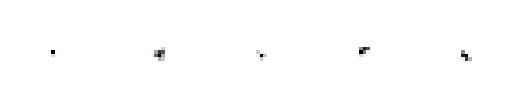

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import numpy as np

def plot_shape_to_bitmap(vertices, size=(25, 25), axes_range=(-2, 3)):
    """
    Plot a shape and convert it to a grayscale bitmap.

    Parameters:
    vertices (numpy array): Vertices of the shape.
    size (tuple): The size of the bitmap.
    axes_range (tuple): The range of the axes.

    Returns:
    numpy array: Grayscale bitmap of the shape.
    """
    # Create a figure with the specified size and range
    fig, ax = plt.subplots(figsize=(size[0]/100, size[1]/100), dpi=100)
    ax.set_xlim(axes_range[0], axes_range[1])
    ax.set_ylim(axes_range[0], axes_range[1])

    # Create a polygon patch and add it to the axis
    polygon = Polygon(vertices, closed=True, edgecolor='none')
    p = PatchCollection([polygon], match_original=True, cmap=plt.cm.gray)
    ax.add_collection(p)

    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    # Draw the canvas and retrieve the pixel buffer
    fig.canvas.draw()
    bitmap = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    bitmap = bitmap.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # Convert to grayscale
    grayscale_bitmap = np.dot(bitmap[...,:3], [0.2989, 0.5870, 0.1140])

    plt.close(fig)  # Close the figure to prevent display
    return grayscale_bitmap

# Assuming random_shapes is a list of shapes (arrays of vertices)
# Example: Convert the first random shape to a grayscale bitmap
random_shapes = [generate_random_shape(num_vertices=np.random.randint(3, 7)) for _ in range(5)]  # Example list of 5 random shapes

for i, shape in enumerate(random_shapes):
    bitmap = plot_shape_to_bitmap(shape)
    plt.subplot(1, len(random_shapes), i+1)
    plt.imshow(bitmap, cmap='gray')
    plt.axis('off')

plt.show()
